In [2]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

In [3]:
import numpy as np
import pandas as pd
import math

In [4]:
data = pd.read_csv("../data/Case3HistoricalPrices.csv")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,S1,S2,S3,S4,S5,S6,S7,S8,B1,B2,...,B7,B8,C1,C2,C3,C4,C5,C6,C7,C8
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.355850,98.307641,95.630621,98.296988,98.474008,95.663069,98.342292,98.416837,100.086605,99.685232,...,99.674428,100.131478,95.854652,95.571202,94.085760,93.956485,94.140624,94.058865,95.786959,94.331430
2,96.766305,97.785655,95.211317,97.876191,96.910785,95.299426,97.862363,96.850881,100.595828,99.614514,...,99.463006,100.594669,87.500105,86.517650,88.861746,89.205952,89.255488,89.203200,86.873750,89.644765
3,99.498201,97.762932,95.831525,97.979482,99.992847,95.890271,97.890721,99.523488,100.687198,99.425275,...,99.220046,100.639175,84.500885,83.306741,86.183137,86.617107,86.643905,86.512592,83.788306,87.068357
4,96.259221,92.942010,94.272932,92.958011,96.469517,94.318577,93.007052,96.278064,101.939638,100.099827,...,99.843072,101.823484,79.974708,78.434282,80.585967,81.404902,81.484117,81.131945,79.157682,81.778226


An autoregressive model takes the past few timesteps as input, weights them accordingly, and predicts the value of the next timestep. The "order" of an AR model is the number of timesteps taken into consideration. Below is an AR model with order p, AR(p):
$$x_t = \alpha_1x_{t-1}+…+\alpha_px_{t-p}+w_t = \sum_{i=1}^{p} t_i \alpha_ix_{t-i}+w_t$$

In [14]:
def train_test_split(data, n_test):
    return list(data[:-n_test]), list(data[-n_test:])

In [15]:
x = np.array([i for i in range(len(data))])
prices = data['S1'].to_numpy()
train, test = train_test_split(prices, 1000)

In [6]:
# Fit ARIMA(p, d, q) model
best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5)
d_rng = range(2)
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            print((i,d,j))
            try:
                tmp_mdl = smt.ARIMA(prices, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: %6.5f | order: %s'%(best_aic, best_order))

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(1, 0, 3)
(1, 0, 4)
(1, 1, 0)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(1, 1, 1)
(1, 1, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(1, 1, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(1, 1, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(2, 0, 3)
(2, 0, 4)
(2, 1, 0)

c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel


(2, 1, 1)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(2, 1, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(2, 1, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(3, 0, 4)
(3, 1, 0)
(3, 1, 1)

c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(3, 1, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(3, 1, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(4, 0, 4)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(4, 1, 0)
(4, 1, 1)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodel

(4, 1, 2)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(4, 1, 3)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(4, 1, 4)
aic: 4973.90017 | order: (4, 1, 4)


c:\users\reina\anaconda3\envs\math\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [7]:
best_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2477.950
Method:                           mle   S.D. of innovations              2.890
Date:                Sat, 10 Apr 2021   AIC                           4973.900
Time:                        00:37:42   BIC                           5018.061
Sample:                             1   HQIC                          4990.685
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -1.3453      0.092    -14.583      0.000      -1.526      -1.165
ar.L2.D.y     -1.7455      0.146    -11.995      0.000      -2.031      -1.460
ar.L3.D.y     -1.0193      0.143     -7.136      0.000      -1.299      -0.739
ar.L4.D.y     -0.6938      0.097     -7.119      0.000      -0.885      -0.503
ma.L1.D.y      1.2715      0.087     14.613      0.000       1.101       1.442
ma.L2.D.y      1.6832      0.128     13.170      0.000       1.433       1.934
ma.L3.D.y      1.0480      0.120      8.763      0.000       0.814       1.282
ma.L4.D.y      0.7464      0.078      9.585      0.000       0.594       0.899
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6982           -0.7710j            1.0401           -0.3671
AR.2           -0.6982           +0.7710j            1.0401            0.3671
AR.3           -0.0364           -1.1537j            1.1543           -0.2550
AR.4           -0.0364           +1.1537j            1.1543            0.2550
MA.1           -0.7235           -0.7640j            1.0522           -0.3707
MA.2           -0.7235           +0.7640j            1.0522            0.3707
MA.3            0.0215           -1.0999j            1.1001           -0.2469
MA.4            0.0215           +1.0999j            1.1001            0.2469
-----------------------------------------------------------------------------
"""

In [8]:
ci95

NameError: name 'ci95' is not defined

In [9]:
# Create a 21 day forecast of returns with 95%, 99% CI
f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
t = 0
def allocate1(asset_prices):
    f, err95, ci95 = best_mdl.forecast(steps=t) # 95% CI
    f, err95, ci95 = f[-1], err95[-1], ci95[-1]
    for i in range(len(asset_prices)):
        if asset_prices[i] > ci95[0]:
            portfolio[i] += 1 # Buy
        elif asset_prices[i] < ci95[1]:
            portfolio[i] = max(portfolio[i] - 1, 0) #Sell
    t += 1
    if sum(portfolio): return portfolio / sum(portfolio) # Return normalized weights
    else: return portfolio

NameError: name 'n_steps' is not defined

In [10]:
f, err95, ci95 = best_mdl.forecast(steps=1000)

In [22]:
f

array([220.53957413, 220.79418284, 221.07177334, 221.10752203,
       220.73033204, 220.71579381, 221.16469525, 220.9458075 ,
       220.73325659, 220.95379748, 220.93975887, 220.9422133 ,
       220.88608659, 220.81861189, 221.01459382, 220.92421166,
       220.81144415, 220.96796527, 220.91037657, 220.8923006 ,
       220.93583502, 220.85892341, 220.94478758, 220.93168389,
       220.84763142, 220.94942331, 220.9129731 , 220.87910223,
       220.94285238, 220.88273759, 220.91215227, 220.93602708,
       220.86960993, 220.92901645, 220.92027985, 220.87947579,
       220.93514807, 220.89916094, 220.89805466, 220.93392063,
       220.88565576, 220.91408116, 220.92429349, 220.88525119,
       220.92446343, 220.90972568, 220.89381966, 220.9280616 ,
       220.8975746 , 220.90525985, 220.92426752, 220.89259958,
       220.91534487, 220.91531356, 220.89474601, 220.92125808,
       220.90574149, 220.90132682, 220.92159587, 220.89945466,
       220.90912847, 220.91716337, 220.89797415, 220.91

In [20]:
ci95.T[0]

array([[214.87488791, 213.07311807, 211.61736876, ...,  43.64957756,
         43.56078831,  43.47204349],
       [226.20426034, 228.51524761, 230.52617793, ..., 398.16814345,
        398.2569327 , 398.34567752]])

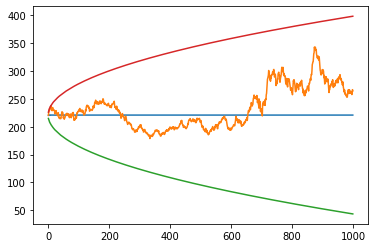

In [21]:
x = [i for i in range(1000)]
plt.plot(x, f)
plt.plot(x, prices[1000:2000])
plt.plot(x, ci95.T[0])
plt.plot(x, ci95.T[1])
plt.show()

In [17]:
f - prices[1000:2000]

array([ 6.83566855e-02, -5.06384421e+00, -5.67815894e+00, -9.56937718e+00,
       -9.04963802e+00, -1.06015338e+01, -1.07893948e+01, -1.49956147e+01,
       -1.70684252e+01, -1.37231447e+01, -1.38679368e+01, -1.18909332e+01,
       -7.83477810e+00, -1.16340106e+01, -1.33937023e+01, -1.15319545e+01,
       -8.99605724e+00, -8.59398943e+00, -9.54239210e+00, -9.01144855e+00,
       -7.54278806e+00, -2.08519034e+00, -4.12260786e+00, -4.19715261e+00,
       -4.56444108e+00, -7.95158807e+00, -5.60647705e+00, -2.16453090e+00,
       -2.05543464e+00, -1.68899587e+00,  1.34887181e+00, -2.47365643e+00,
       -4.37801089e+00, -1.83006631e+00,  6.15236147e-01,  5.56814999e+00,
        4.66255992e+00,  4.56196152e+00,  6.53028426e+00,  4.90895215e+00,
        5.78235161e+00,  6.29752637e+00,  1.57855495e+00, -5.36684086e-01,
       -5.63263687e+00, -5.73560954e+00, -4.16120503e+00, -4.59918818e+00,
       -8.06363175e-01,  5.48509997e+00,  3.81259689e+00,  3.81702177e+00,
        7.41528984e+00,  